In [10]:
from obspy import read
from RayDecPy import main as ray
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fmin = 0.2
fmax = 2
fsteps = 50
cycles = 10
dfpar = 0.2
nwind = 10

In [51]:
st = read('./SHL-Noise/*.mseed')
st.merge(-1)
st.detrend('constant')
st.merge(fill_value=0)

3 Trace(s) in Stream:
.R001..E | 2017-01-18T06:51:21.000000Z - 2017-01-18T07:21:20.990000Z | 100.0 Hz, 180000 samples
.R001..N | 2017-01-18T06:51:21.000000Z - 2017-01-18T07:21:20.990000Z | 100.0 Hz, 180000 samples
.R001..Z | 2017-01-18T06:51:21.000000Z - 2017-01-18T07:21:20.990000Z | 100.0 Hz, 180000 samples

In [52]:
st_slide = st.slide(window_length=50,
                    step=50,
                    offset=0,
                    include_partial_windows=False,
                    nearest_sample=True)

In [53]:
fl_lst = []
el_lst = []
for st_window in st_slide:
    fl, el = ray.Raydec_on1station(st=st_window,
                                   fmin=fmin,
                                   fmax=fmax,
                                   fsteps=fsteps,
                                   cycles=cycles,
                                   dfpar=dfpar)
    fl_lst.append(fl)
    el_lst.append(el)

/home/iman/Documents/GitHub/RayDec/RayDecPy/main.py:158: RuntimeWarning: invalid value encountered in scalar divide
  result = np.sum(radial**2) / np.sum(vert**2)


In [54]:
el_arr = np.array(el_lst)
el_mean = np.nanmean(el_arr, axis=0)

/tmp/ipykernel_7435/1768269260.py:2: RuntimeWarning: Mean of empty slice
  el_mean = np.nanmean(el_arr, axis=0)


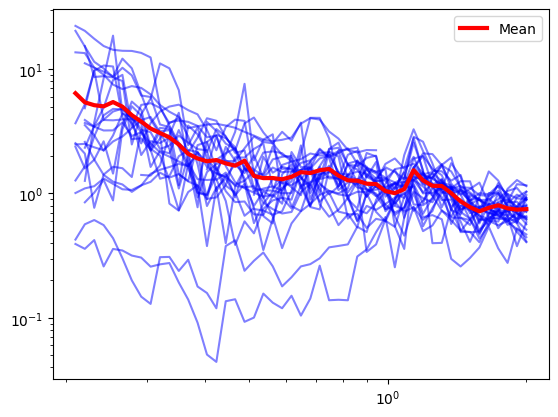

In [59]:
for fl, el in zip(fl_lst, el_lst):
    plt.loglog(fl, el, 'b', alpha=0.5)
plt.loglog(fl, el_mean, 'r', lw=3, label='Mean')
plt.legend()